In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [6]:
# Load datasets
ev_data = pd.read_csv(r"C:\Users\KIIT\Downloads\Team 1 B-SB-23-8-1 EV\Jasmeet Singh\Dataset 1\ev_data1.csv", encoding='ISO-8859-1')
cars_data = pd.read_csv(r"C:\Users\KIIT\Downloads\Team 1 B-SB-23-8-1 EV\Jasmeet Singh\Dataset 2\cars_ds_final.csv", encoding='ISO-8859-1')

# Display basic information
print("EV Data Overview:")
print(ev_data.info())
print(ev_data.head())

print("\nCars Data Overview:")
print(cars_data.info())
print(cars_data.head())


EV Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               369 non-null    int64  
 1   Title                    369 non-null    object 
 2   Battery Size (kWh)       369 non-null    float64
 3   Top Speed (km/h)         369 non-null    object 
 4   Range (km)               369 non-null    object 
 5   Efficiency (Wh/km)       369 non-null    object 
 6   Fastcharge Speed (km/h)  369 non-null    object 
 7    price                   369 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 23.2+ KB
None
   Unnamed: 0                                Title  Battery Size (kWh)  \
0           0                        Tesla Model 3                57.5   
1           1  Tesla Model Y Long Range Dual Motor                75.0   
2           2  Tesla Model 3 Long Range Dual Mot

Unnamed: 0                   0
Title                        0
Battery Size (kWh)           0
Top Speed (km/h)             0
Range (km)                   0
Efficiency (Wh/km)           0
Fastcharge Speed (km/h)      0
 price                       0
price                        0
price_cleaned              136
dtype: int64


<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
C:\Users\KIIT\AppData\Local\Temp\ipykernel_28308\2474829845.py:12: SyntaxWarning: invalid escape sequence '\d'
  ev_data['price'] = ev_data[' price '].str.replace('[^\d.]', '', regex=True)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_28308\2474829845.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ev_data['price_cleaned'].fillna(ev_data['price_cleaned'].median(), inplace=True)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_2830

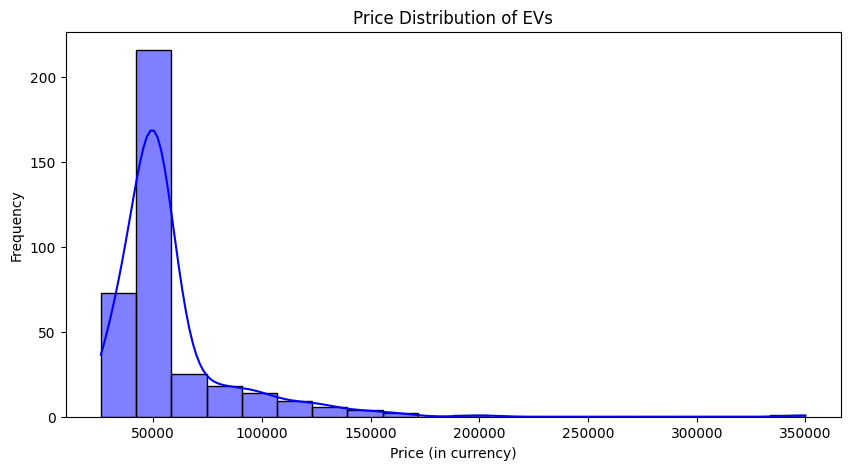

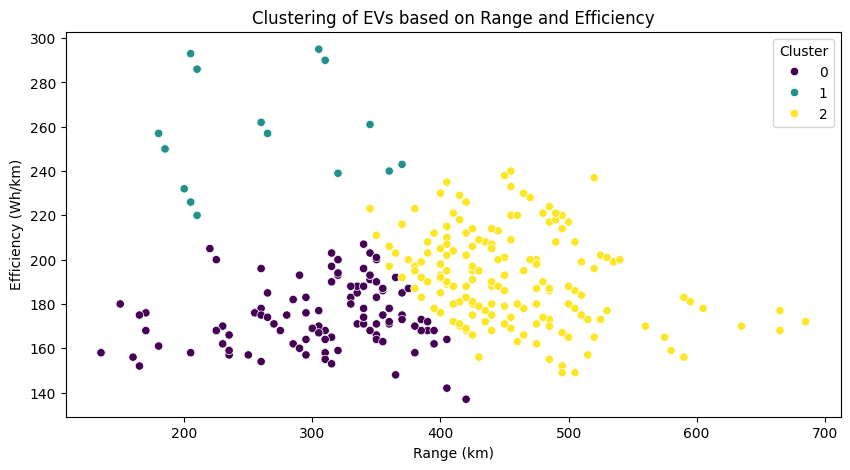

Cluster Centers:
[[0.31138099 0.23451541 0.05324887]
 [0.18400673 0.75339897 0.07227383]
 [0.58038538 0.34847964 0.13712611]]
                                 Title  Range (km)  Efficiency (Wh/km)  \
0                        Tesla Model 3       405.0               142.0   
1  Tesla Model Y Long Range Dual Motor       435.0               172.0   
2  Tesla Model 3 Long Range Dual Motor       485.0               155.0   
3                           BYD ATTO 3       330.0               183.0   
4                        Tesla Model 3       420.0               137.0   

   price_cleaned  Cluster  
0        42990.0        0  
1        52990.0        2  
2        50990.0        2  
3        37195.0        0  
4        44000.0        0  


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Load the dataset (adjust path as needed)
ev_data = pd.read_csv(r"C:\Users\KIIT\Downloads\Team 1 B-SB-23-8-1 EV\Jasmeet Singh\Dataset 1\ev_data1.csv", encoding='ISO-8859-1')

# Clean the 'price' column by removing extra spaces and any non-numeric characters
ev_data['price'] = ev_data[' price '].str.replace('[^\d.]', '', regex=True)

# Convert 'price' to numeric (float), coerce errors to NaN
ev_data['price_cleaned'] = pd.to_numeric(ev_data['price'], errors='coerce')

# Clean the 'Range (km)' and 'Efficiency (Wh/km)' columns by removing non-numeric characters
ev_data['Range (km)'] = ev_data['Range (km)'].str.replace(r'[^\d]', '', regex=True).astype(float)
ev_data['Efficiency (Wh/km)'] = ev_data['Efficiency (Wh/km)'].str.replace(r'[^\d.]', '', regex=True).astype(float)

# Check for missing values after cleaning
print(ev_data.isnull().sum())

# Fill missing price values with the median (or you can handle it differently)
ev_data['price_cleaned'].fillna(ev_data['price_cleaned'].median(), inplace=True)

# Fill missing values in other columns as needed
ev_data['Range (km)'].fillna(ev_data['Range (km)'].median(), inplace=True)
ev_data['Efficiency (Wh/km)'].fillna(ev_data['Efficiency (Wh/km)'].median(), inplace=True)

# Plot price distribution
plt.figure(figsize=(10, 5))
sns.histplot(ev_data['price_cleaned'], bins=20, kde=True, color='blue')
plt.title('Price Distribution of EVs')
plt.xlabel('Price (in currency)')
plt.ylabel('Frequency')
plt.show()

# Selecting features for clustering
features = ev_data[['Range (km)', 'Efficiency (Wh/km)', 'price_cleaned']].dropna()

# Normalize data
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
ev_data['Cluster'] = kmeans.fit_predict(scaled_features)

# Plot clustering results
plt.figure(figsize=(10, 5))
sns.scatterplot(x=ev_data['Range (km)'], y=ev_data['Efficiency (Wh/km)'], hue=ev_data['Cluster'], palette='viridis')
plt.title('Clustering of EVs based on Range and Efficiency')
plt.xlabel('Range (km)')
plt.ylabel('Efficiency (Wh/km)')
plt.legend(title='Cluster')
plt.show()

# Display cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Show first few rows with the cluster labels
print(ev_data[['Title', 'Range (km)', 'Efficiency (Wh/km)', 'price_cleaned', 'Cluster']].head())


In [21]:
# Specify the path where you want to save the cleaned data
output_file = r'C:\Users\KIIT\Downloads\cleaned_ev_data.csv'

# Save the DataFrame to CSV
ev_data.to_csv(output_file, index=False)

print(f"Data saved to {output_file}")

Data saved to C:\Users\KIIT\Downloads\cleaned_ev_data.csv
